# Example

In [1]:
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
%config InlineBackend.figure_format = 'retina'
# Initialize random number generator
RANDOM_SEED = 1337
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

In [4]:
# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0] * X1 + beta[1] * X2 + rng.normal(size=size) * sigma

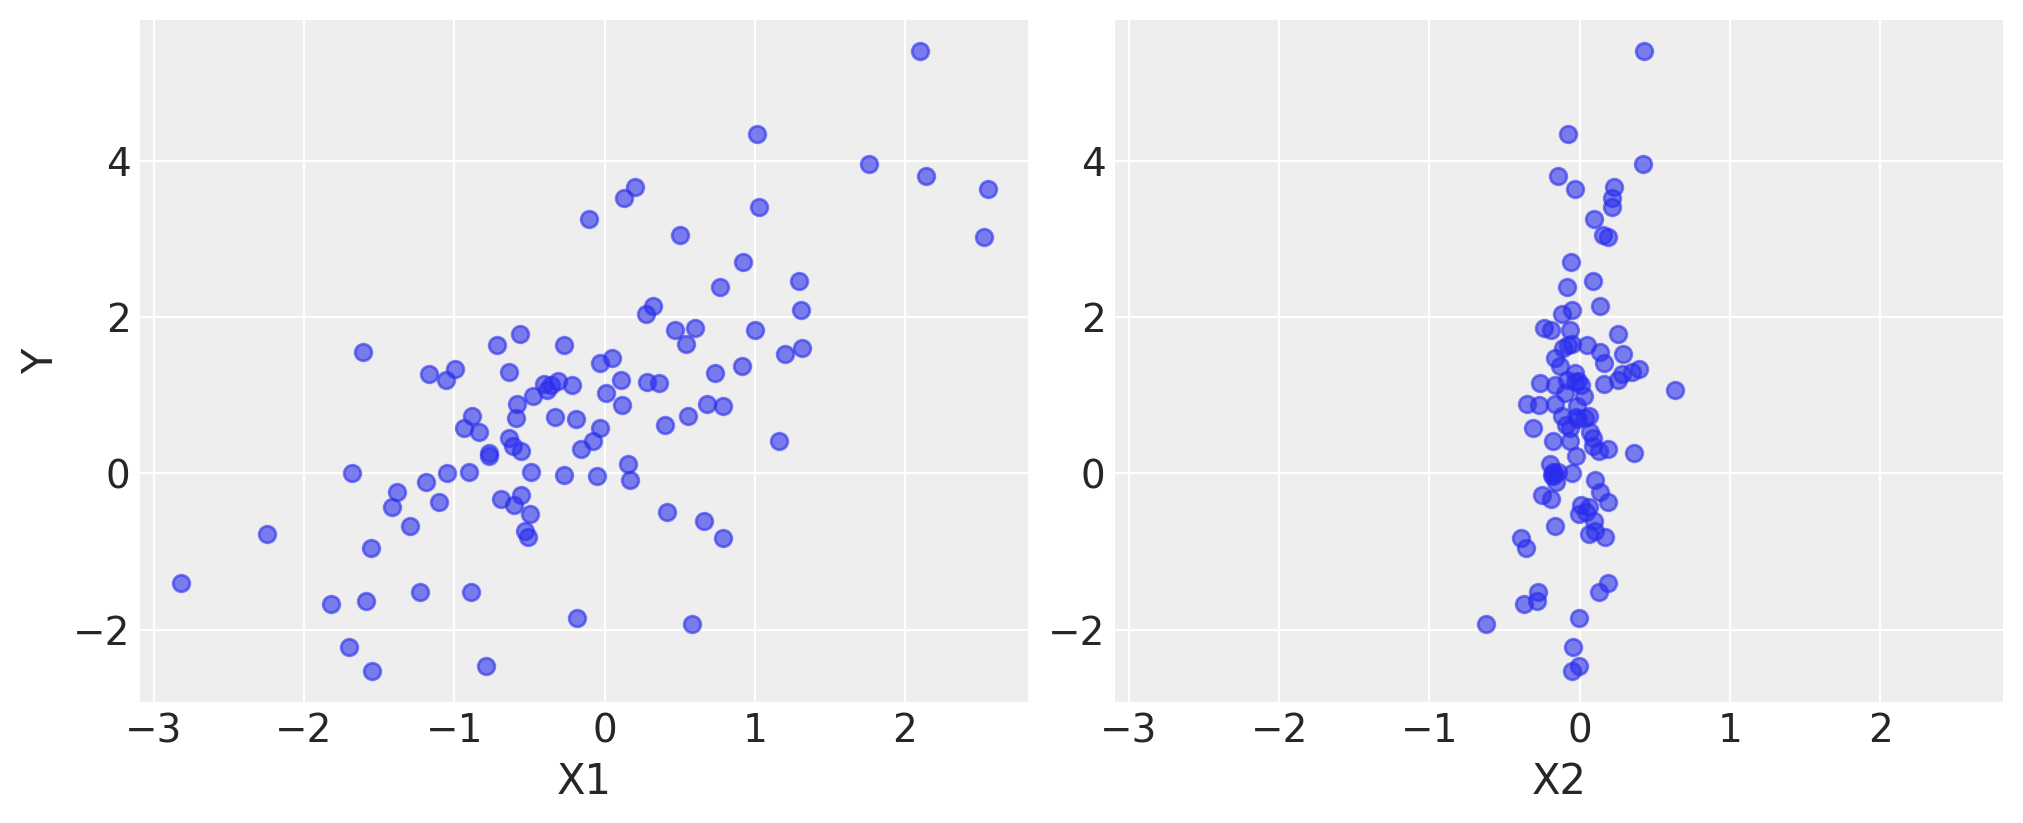

In [5]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10, 4))
axes[0].scatter(X1, Y, alpha=0.6)
axes[1].scatter(X2, Y, alpha=0.6)
axes[0].set_ylabel("Y")
axes[0].set_xlabel("X1")
axes[1].set_xlabel("X2");

In [6]:
import pymc as pm

print(f"Running on PyMC v{pm.__version__}")

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Running on PyMC v5.8.0


In [9]:
basic_model = pm.Model()

with basic_model:
    # Priors for unknown model parameters
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta = pm.Normal("beta", mu=0, sigma=10, shape=2)
    sigma = pm.HalfNormal("sigma", sigma=1)

    # Expected value of outcome
    mu = alpha + beta[0] * X1 + beta[1] * X2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=Y)

In [10]:
with basic_model:
    # draw 1000 posterior samples
    idata = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 136 seconds.


In [11]:
idata

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [12]:
idata.posterior["alpha"].sel(draw=slice(0, 4))

<xarray.DataArray 'alpha' (chain: 4, draw: 5)>
array([[0.89103151, 1.06114388, 1.05908679, 0.96011848, 0.94740304],
       [1.08221678, 1.08221678, 0.95719032, 0.90638625, 0.91449501],
       [0.88826312, 0.89157261, 0.96466878, 1.145081  , 0.92989234],
       [0.81634867, 0.8861179 , 0.76237683, 1.10164132, 1.04022351]])
Coordinates:
  * chain    (chain) int32 0 1 2 3
  * draw     (draw) int32 0 1 2 3 4

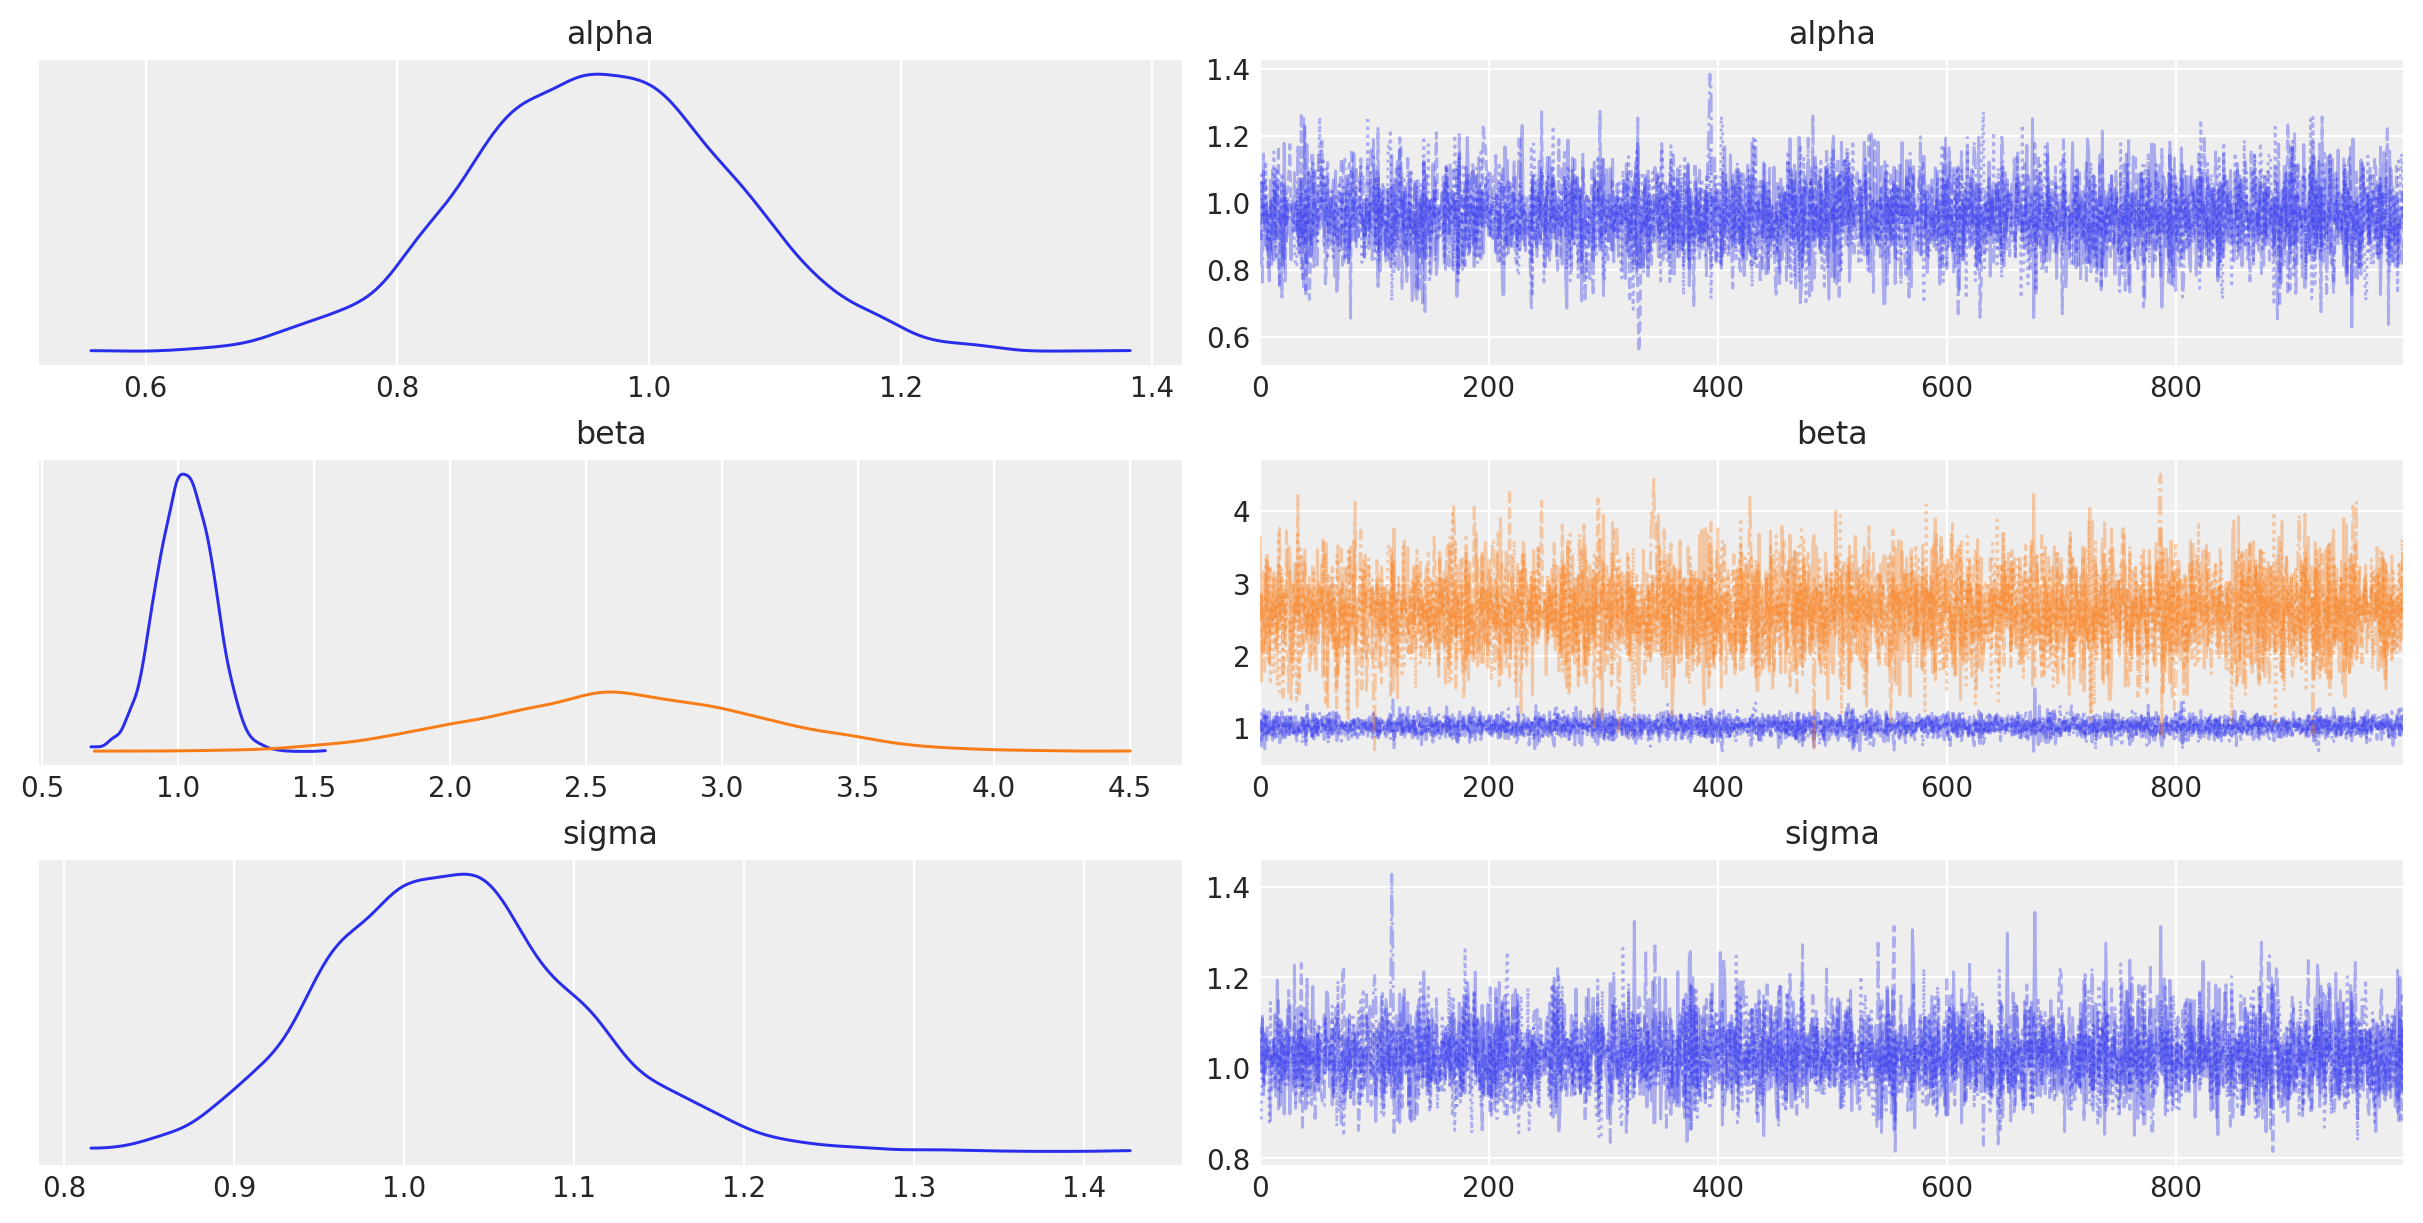

In [13]:
az.plot_trace(idata, combined=True)

In [14]:
az.summary(idata, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,0.96,0.10,0.76,1.15,0.00,0.0,5608.55,3372.24,1.0
beta[0],1.03,0.10,0.83,1.21,0.00,0.0,6526.26,3019.81,1.0
beta[1],2.62,0.52,1.66,3.59,0.01,0.0,6008.98,3160.29,1.0
sigma,1.03,0.07,0.89,1.16,0.00,0.0,5499.47,3226.34,1.0


# Fish Market Dataset

In [27]:
# read data from github
df = pd.read_csv('https://raw.githubusercontent.com/Ankit152/Fish-Market/main/Fish.csv')

# find the fish with weight 0
print(df[df['Weight'] == 0])

# remove from the dataset
df = df[df['Weight'] != 0]

# only keep correlated features
df = df[["Weight", "Length1", "Height"]]

df.head()

   Species  Weight  Length1  Length2  Length3  Height   Width
40   Roach     0.0     19.0     20.5     22.8  6.4752  3.3516


,Weight,Length1,Height
0,242.0,23.2,11.5200
1,290.0,24.0,12.4800
2,340.0,23.9,12.3778
3,363.0,26.3,12.7300
4,430.0,26.5,12.4440
